# DS_Taxi_strategy

## Тема:
«Формирование стратегии крупного агрегатора такси (поиск инсайтов, проверка гипотезы, составление рекомендаций стейкхолдерам, построение предиктивной модели)».

## Цель задания:
- Собрать все полученные на курсе знания воедино.
- Закрепить умение исследовать данные, проверять гипотезу, делать выводы и презентовать результаты.
- Закрепить умение исследовать внешние факторы, строить модель, получать прогноз и делать выводы.


## Задание:
### Введение:
Поздравляем! Вы попали на стажировку в одно из подразделений группы компаний, Вы — аналитик крупного агрегатора такси. Теперь перед вами стоит важная задача: самостоятельно провести исследование данных, проверить гипотезу о поведенческом предпочтении пользователей к определённому классу такси и сделать выводы, чтобы помочь компании стать лучшей на рынке. Успехов!



In [9]:
import numpy as np # Numerical Python
import pandas as pd # работа с данными
import matplotlib.pyplot as plt # визуализация
import seaborn as sns
from scipy import stats # статистика

### 1	Загрузите файл dip_hw_x_taxi.csv в pandas dataframe

In [4]:
my_path = r'data/dip_hw_x_taxi.csv'
data = pd.read_csv(my_path)
data.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,23,53.114,Premium,1
1,436,3,10,5.781,Delivery,1
2,1327,6,19,16.200,Delivery,0
3,2013,2,2,13.732,Delivery,0
4,2241,6,3,20.436,Premium,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_gk           2000 non-null   int64  
 1   weekday_key        2000 non-null   int64  
 2   hour_key           2000 non-null   int64  
 3   distance_km        2000 non-null   float64
 4   offer_class_group  2000 non-null   object 
 5   driver_response    2000 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 93.9+ KB


Значение столбцов: 

- order_gk — идентификатор поездки;
- weekday_key — день недели совершения поездки;
- hour_key — час совершения поездки;
- distance_km — дистанция поездки;
- offer_class_group — класс поездки (Economy, Comfort, Premium, Delivery);
- driver_response — статус поездки (1 — поездка совершена; 0 — отмена).

### 2	Рассчитайте основные описательные статистики (среднее, минимум, 25-50-75-персентили, максимум)

In [7]:
data.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,462807.384000,4.044000,11.608500,26.275848,0.587000
std,270556.211847,2.007256,6.918465,18.876336,0.492496
min,412.000000,1.000000,0.000000,0.024000,0.000000
25%,227126.500000,2.000000,6.000000,12.177000,0.000000
50%,458637.000000,4.000000,12.000000,22.828500,1.000000
75%,709420.250000,6.000000,18.000000,36.434250,1.000000
max,919196.000000,7.000000,23.000000,138.950000,1.000000


### Вопросы:
1. Как распределяется количество поездок по дням недели? По часам? По часам в будни и в выходные? 

*Найти в какой день недели больше/меньше всего поездок? В какие часы?
В какие дни и часы наблюдается пик спроса на такси?*



2. Как распределяются поездки по классам? 

*Определить количество поезок каждого из них.
Какие классы поездок (Economy, Comfort, Premium, Delivery) наиболее популярны?*

3. В какой день / час больше или меньше всмего поездок для каждого класса?

*Выявить закономерности по периодам времени поездок по каждому классу сервиса.*

4. Какое среднее расстояние поездки для каждого класса?

   *Выявить закономерности в длине поездок по каждому классу сервиса.*

5. Каково отношение количества отмененных поездок ко всем поездкам? 


6. Какой процент отмененных поездок (driver_response = 0) в зависимости от времени дня и дня недели?

   *Найти периоды с наибольшей вероятностью отмены поездок.*

7. Поездки какого класса чаще всего отменяют? А в процентном соотношении по классам? 

*Есть ли зависимости между классом поездки и вероятностью ее отмены?*

8. Какие изменения в спросе и отменах поездок в разные дни недели и часы?




1. Как распределяется количество поездок по дням недели? По часам? По часам в будни и в выходные? 

*Найти в какой день недели больше/меньше всего поездок? В какие часы?
В какие дни и часы наблюдается пик спроса на такси?*

Ответ: 

Больше всего поездок в воскресенье, меньше всего в среду и в пятницу, а также в понедельник очень мало заказов.

В будни пик спроса на такси наблюдается в 13, 1, 16, 8 и 7 часов. 
В выходные дни самый высокий спрос в 20 и 00, также высокий спрос в 5 и 15 часов. 

Минимальное количество заказов по будням в 15 часов.
А по выходным - в 1 (час).

In [135]:
data['workday'] = data['weekday_key'] <= 5

weekday_key
7    301
4    294
6    292
2    284
1    277
3    276
5    276
Name: count, dtype: int64
Больше всего поездок в : Воскресенье
Меньше всего поездок в : Среда



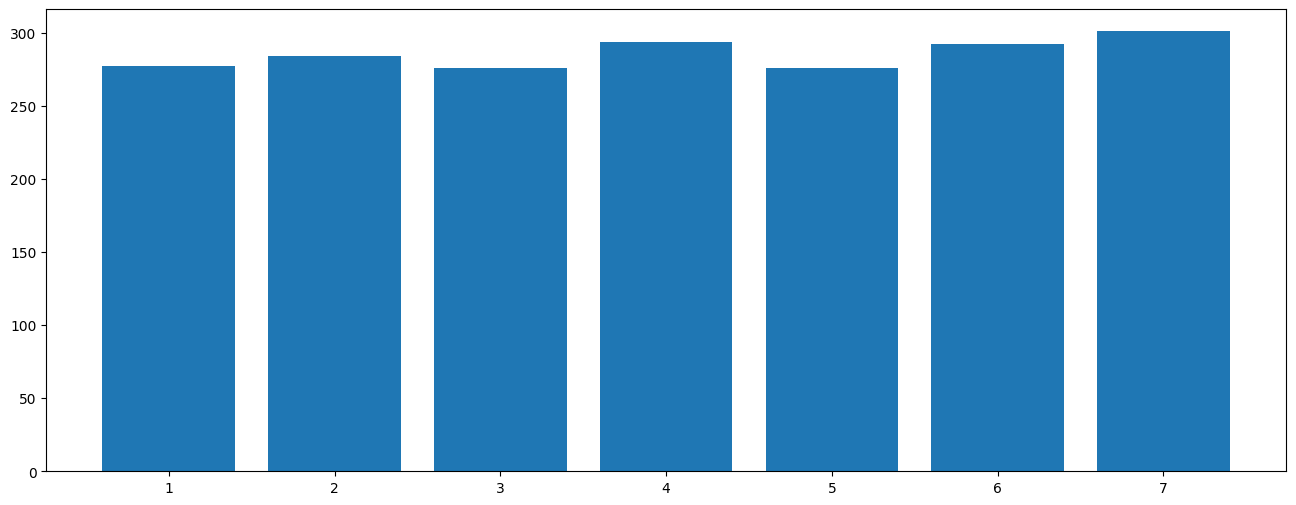

In [136]:
# Дни недели и часы с наибольшим/наименьшим количеством поездок
weekday_dict = {1 : 'Понедельник', 2 : 'Вторник', 3 : 'Среда', 4 : 'Четверг',
                5 : 'Пятница', 6 : 'Суббота', 7 : 'Воскресенье'

}
plt.figure(figsize=(16, 6))
trips_by_weekday = data['weekday_key'].value_counts()
print(data['weekday_key'].value_counts())
plt.bar(trips_by_weekday.index, trips_by_weekday.values)

print(f'Больше всего поездок в : {weekday_dict[trips_by_weekday.idxmax()]}')
print(f'Меньше всего поездок в : {weekday_dict[trips_by_weekday.idxmin()]}\n')

<BarContainer object of 24 artists>

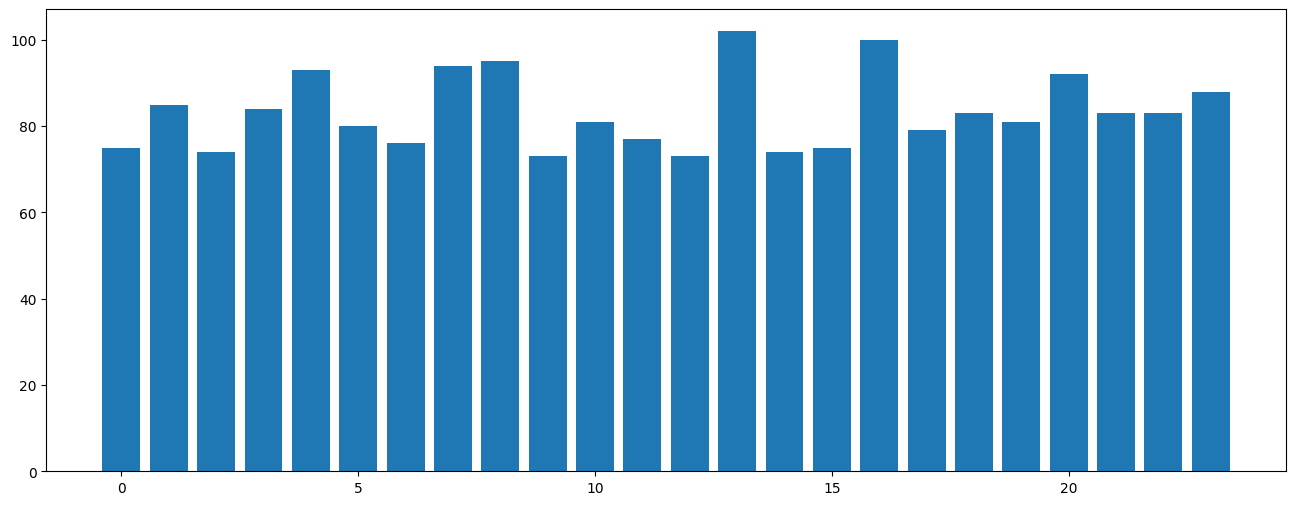

In [137]:
plt.figure(figsize=(16, 6))
trips_by_hour = data['hour_key'].value_counts()
plt.bar(trips_by_hour.index, trips_by_hour.values)

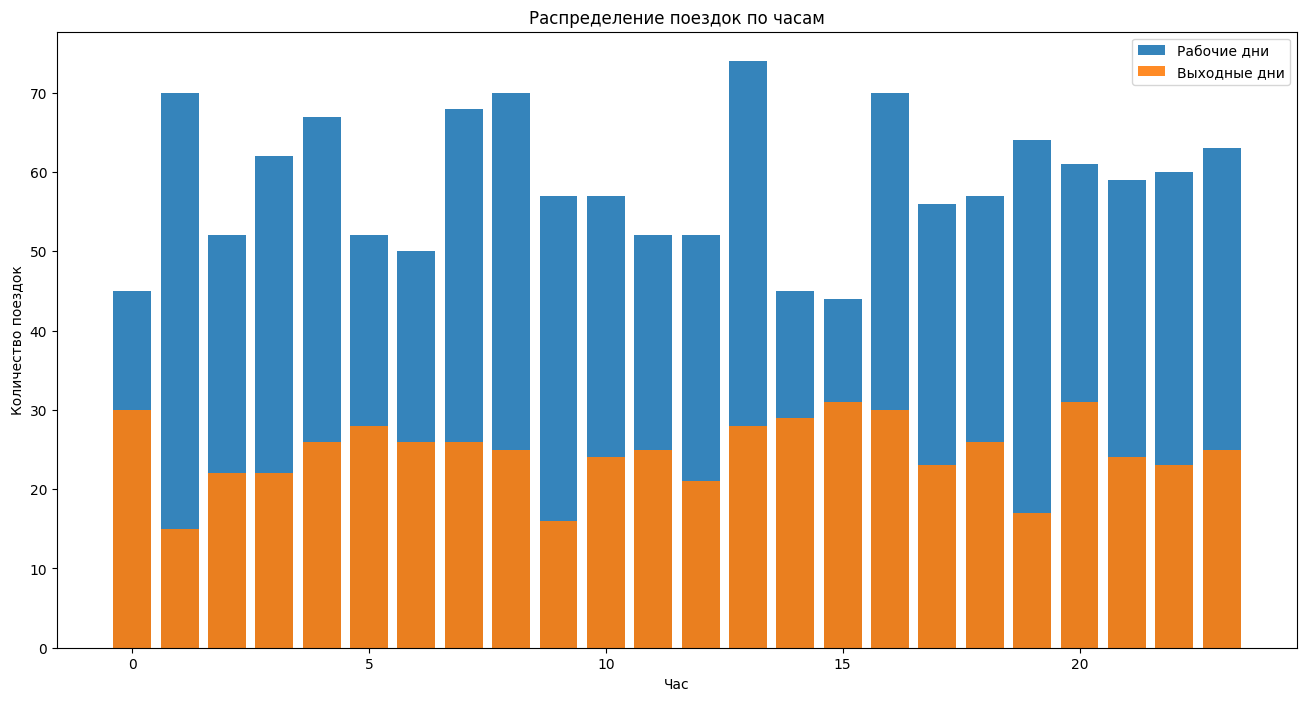

In [138]:
plt.figure(figsize=(16, 8))

# Фильтрация данных по рабочим и выходным дням
trips_by_hour_workday = data[data['workday'] == True]['hour_key'].value_counts()
trips_by_hour_weekend = data[data['workday'] == False]['hour_key'].value_counts()

plt.bar(trips_by_hour_workday.index, trips_by_hour_workday.values, alpha=0.9, label='Рабочие дни')
plt.bar(trips_by_hour_weekend.index, trips_by_hour_weekend.values, alpha=0.9, label='Выходные дни')

plt.title('Распределение поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()


In [139]:
print(f'Пик спроса в  {trips_by_hour_workday.idxmax()}.00 (рабочий день)')
print(f'Минимум поездок в  {trips_by_hour_workday.idxmin()}.00 (рабочий день)\n')
print(f'Пик спроса в {trips_by_hour_weekend.idxmax()}.00 (выходной день)')
print(f'Минимум поездок в {trips_by_hour_weekend.idxmin()}.00 (выходной день)')

Пик спроса в  13.00 (рабочий день)
Минимум поездок в  15.00 (рабочий день)

Пик спроса в 20.00 (выходной день)
Минимум поездок в 1.00 (выходной день)


### 3	Вычислите количество значений по классам такси

2. Как распределяются поездки по классам? 

*Определить количество поезок каждого из них.
Какие классы поездок (Economy, Comfort, Premium, Delivery) наиболее популярны?*

offer_class_group
Premium     500
Delivery    500
Comfort     500
Economy     500
Name: count, dtype: int64


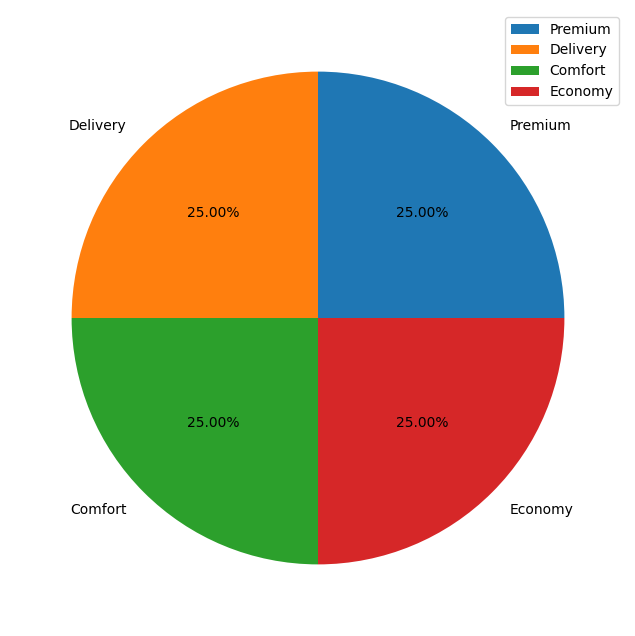

In [140]:
plt.figure(figsize=(16, 8))
trips_by_class = data['offer_class_group'].value_counts()
print(trips_by_class.sort_values())

plt.pie(trips_by_class.values, labels=trips_by_class.index, autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.show()

Классы сбалансированы

3. В какой день / час больше или меньше всмего поездок для каждого класса?

*Выявить закономерности по периодам времени поездок по каждому классу сервиса.*

Text(0, 0.5, 'Количество поездок')

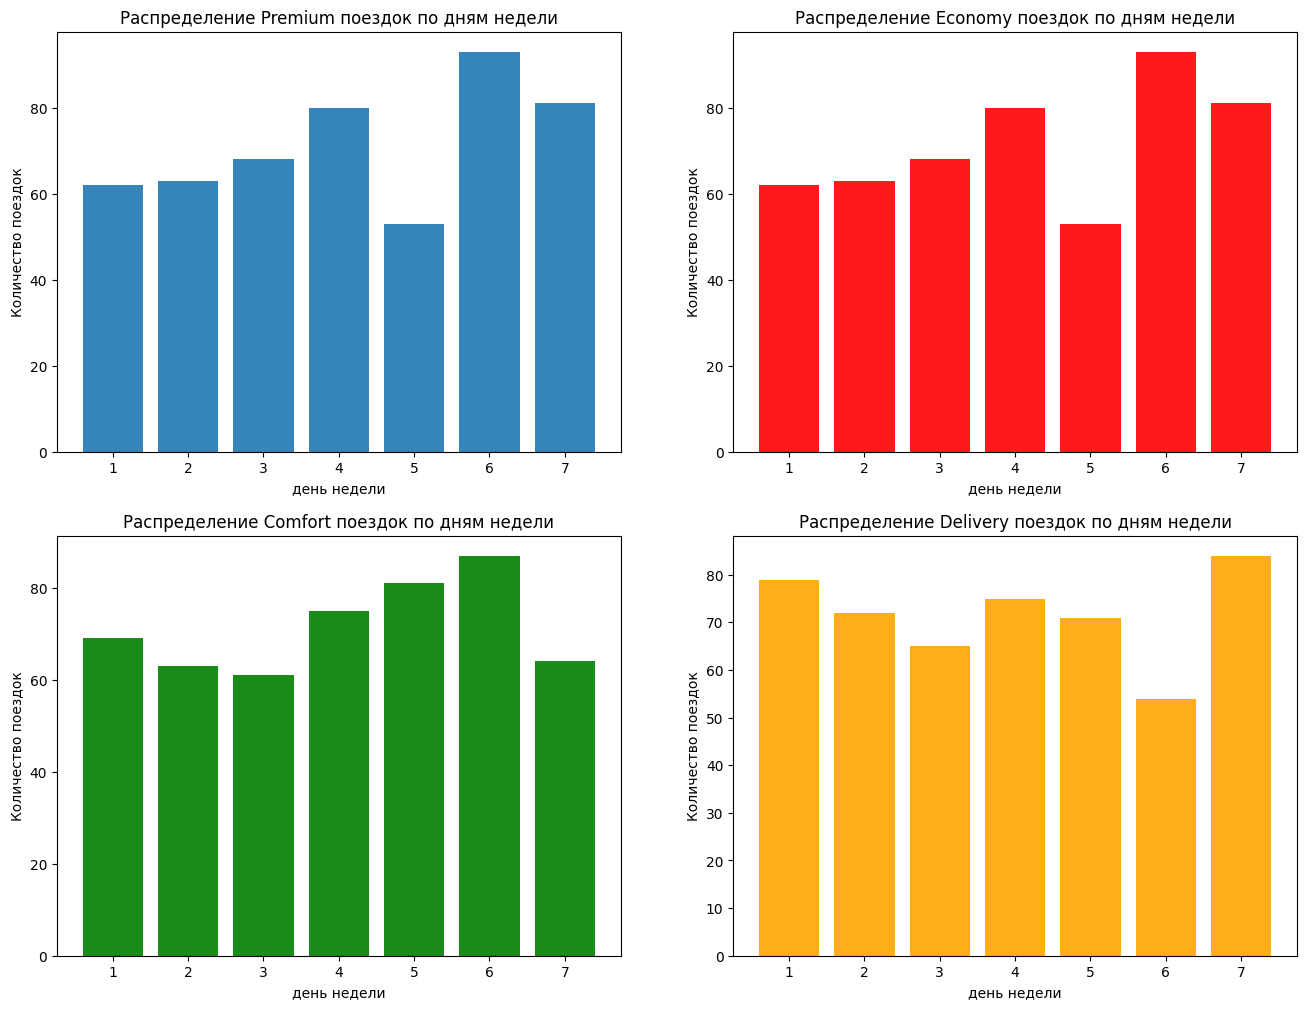

In [141]:
plt.figure(figsize=(16, 12))

# Фильтрация данных по классам на каждый день недели
trips_by_day_premium = data[data['offer_class_group'] == 'Premium']['weekday_key'].value_counts()
trips_by_day_delivery = data[data['offer_class_group'] == 'Delivery']['weekday_key'].value_counts()
trips_by_day_comfort = data[data['offer_class_group'] == 'Comfort']['weekday_key'].value_counts()
trips_by_day_economy = data[data['offer_class_group'] == 'Economy']['weekday_key'].value_counts()


plt.subplot(2, 2, 1)
plt.bar(trips_by_day_premium.index, trips_by_day_premium.values, alpha=0.9, label='Premium')
plt.title('Распределение Premium поездок по дням недели')
plt.xlabel('день недели')
plt.ylabel('Количество поездок')

plt.subplot(2, 2, 2)
plt.bar(trips_by_day_premium.index, trips_by_day_premium.values, alpha=0.9, label='Economy', color='red')
plt.title('Распределение Economy поездок по дням недели')
plt.xlabel('день недели')
plt.ylabel('Количество поездок')

plt.subplot(2, 2, 3)
plt.bar(trips_by_day_comfort.index, trips_by_day_comfort.values, alpha=0.9, label='Comfort', color='green')
plt.title('Распределение Comfort поездок по дням недели')
plt.xlabel('день недели')
plt.ylabel('Количество поездок')

plt.subplot(2, 2, 4)
plt.bar(trips_by_day_delivery.index, trips_by_day_delivery.values, alpha=0.9, label='Delivery', color='orange')
plt.title('Распределение Delivery поездок по дням недели')
plt.xlabel('день недели')
plt.ylabel('Количество поездок')


Поездки Premium и Economy классов распределены по деням недели одинаково: самый высокий спрос в субботу, чуть ниже в четверг и в воскресенье. 

Поездки по тарифу Comfort также имеют высокий уровень спроса в субботу, но в отличие от двух предыдущих классов они пользуются популярностью в пятницу. 


Поездки по тарифу Delivery также имеют самый низкий уровень спроса в субботу, а самый высокий в воскресенье. 

Text(0, 0.5, 'Количество поездок')

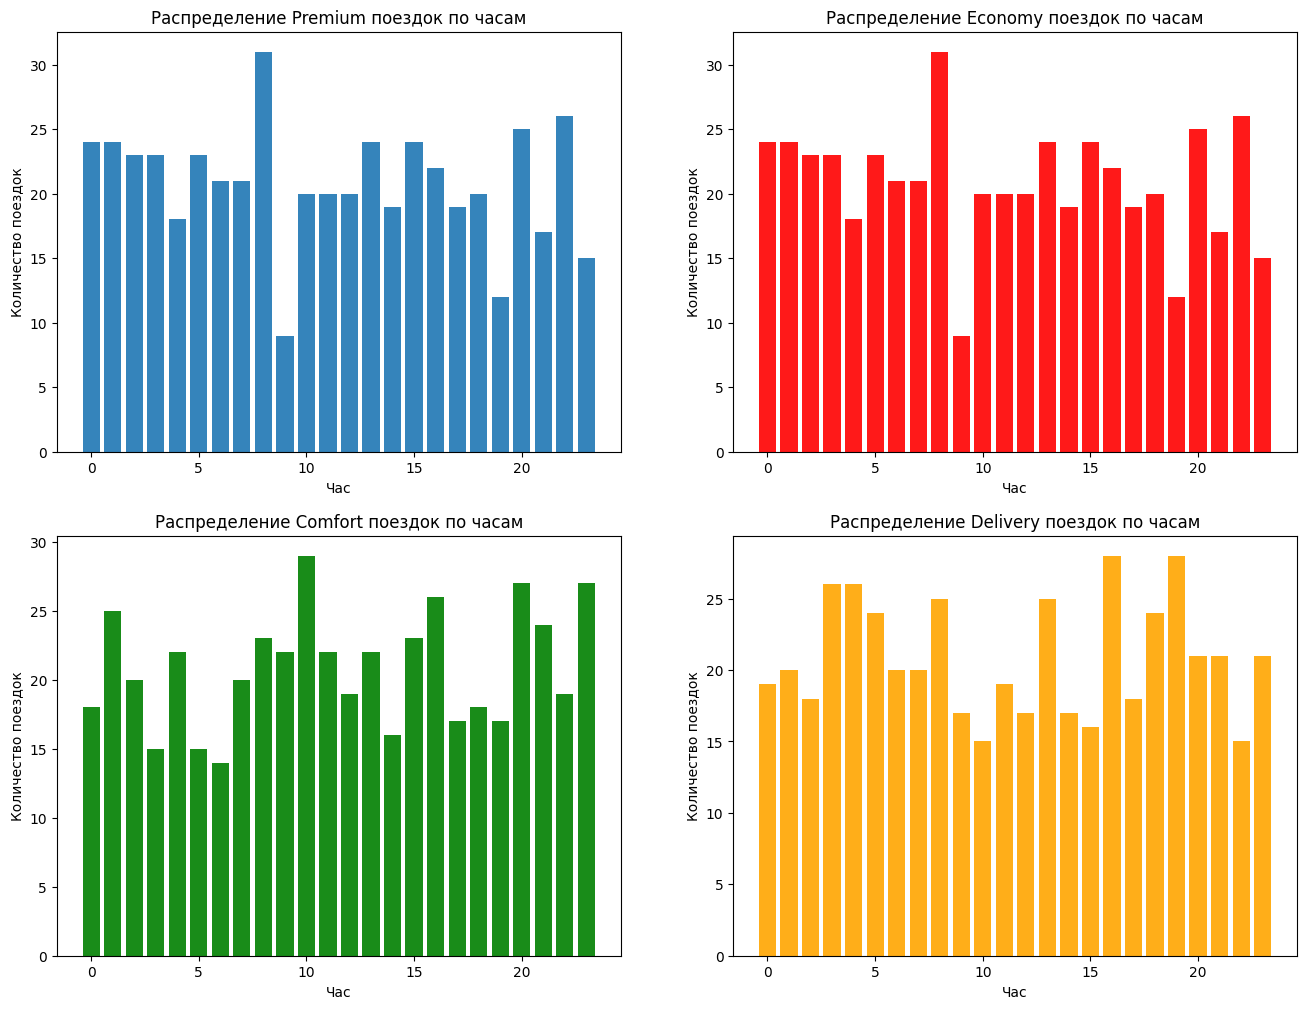

In [142]:
plt.figure(figsize=(16, 12))

# Фильтрация данных по классам на каждый час
trips_by_hour_premium = data[data['offer_class_group'] == 'Premium']['hour_key'].value_counts()
trips_by_hour_delivery = data[data['offer_class_group'] == 'Delivery']['hour_key'].value_counts()
trips_by_hour_comfort = data[data['offer_class_group'] == 'Comfort']['hour_key'].value_counts()
trips_by_hour_economy = data[data['offer_class_group'] == 'Economy']['hour_key'].value_counts()


plt.subplot(2, 2, 1)
plt.bar(trips_by_hour_premium.index, trips_by_hour_premium.values, alpha=0.9, label='Premium')
plt.title('Распределение Premium поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')

plt.subplot(2, 2, 2)
plt.bar(trips_by_hour_premium.index, trips_by_hour_premium.values, alpha=0.9, label='Economy', color='red')
plt.title('Распределение Economy поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')

plt.subplot(2, 2, 3)
plt.bar(trips_by_hour_comfort.index, trips_by_hour_comfort.values, alpha=0.9, label='Comfort', color='green')
plt.title('Распределение Comfort поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')

plt.subplot(2, 2, 4)
plt.bar(trips_by_hour_delivery.index, trips_by_hour_delivery.values, alpha=0.9, label='Delivery', color='orange')
plt.title('Распределение Delivery поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')


Поездки Premium и Economy классов распределены по часам примерно одинаково: самый высокий спрос 8 часов, чуть ниже в 20 и 22. Минимальный спрос в 9 и 19 часов. 

Поездки по тарифу Comfort имеют высокий уровень спроса в 10 часов, чуть ниже в 20 и 23 

Поездки по тарифу Delivery сильно отличаются от остальных: минимальный спрос в 10 и 22 часов, пики в 16 и 19, а также в 3 и 4часа. 

### 4	Визуализируйте распределение дистанций поездок

4. Какое среднее расстояние поездки для каждого класса?

   *Выявить закономерности в длине поездок по каждому классу сервиса.*

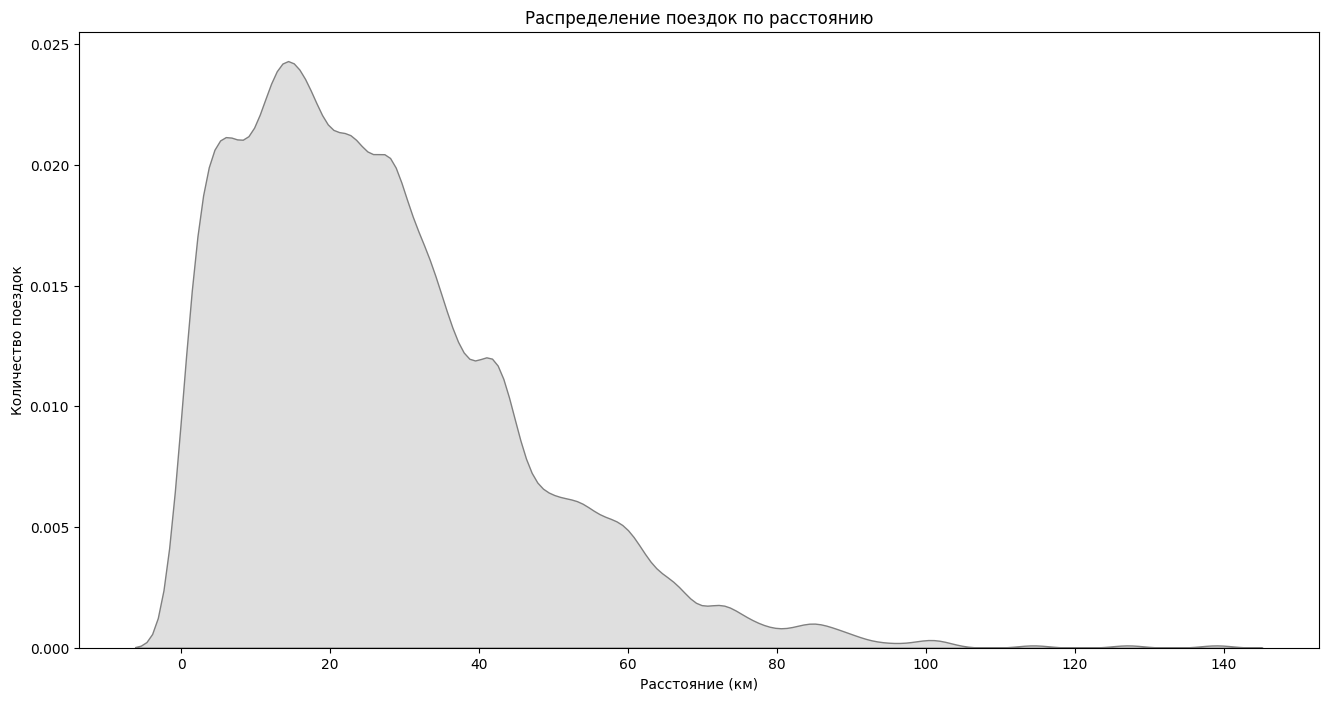

In [143]:
trips_by_distance= data['distance_km']


#  Построение гистограмм по расстоянию для каждого класса
plt.figure(figsize=(16, 8))
sns.kdeplot(trips_by_distance, fill=True, color='grey', bw_adjust=0.5)
plt.title('Распределение поездок по расстоянию')
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество поездок')

plt.show()

У построенного графика функции есть отрицательные значения, расстояние не может быть меньше 0. Такое распределение объясняется тем, что функция sns.kdeplot и не отражает реальное распределение данных, она пытается создать оценку того, как функция могла бы выглядеть.

### 5	Визуализируйте распределения дистанций поездок, по каждому классу такси в отдельности, а также определите типы распределений для эконом-класса и комфорт-класса

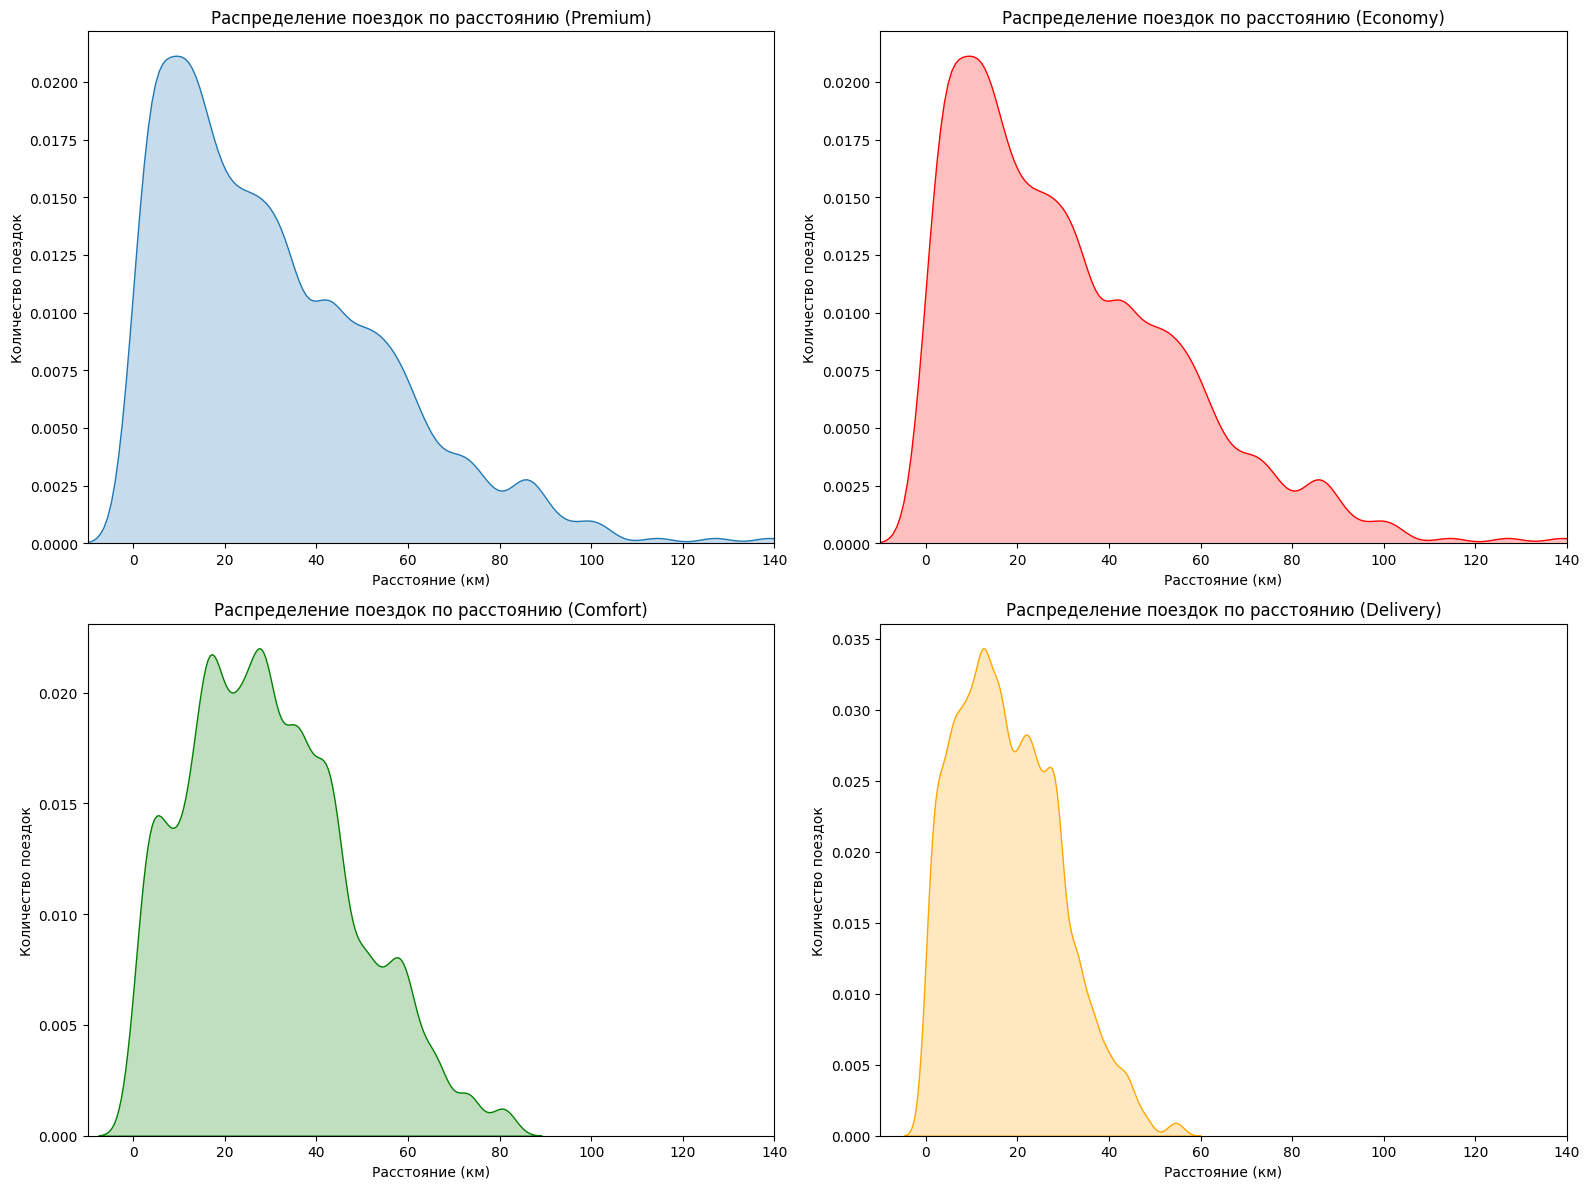

In [144]:
# Фильтрация данных по классам 
trips_by_distance_premium = data[data['offer_class_group'] == 'Premium']['distance_km']
trips_by_distance_economy = data[data['offer_class_group'] == 'Economy']['distance_km']
trips_by_distance_comfort = data[data['offer_class_group'] == 'Comfort']['distance_km']
trips_by_distance_delivery = data[data['offer_class_group'] == 'Delivery']['distance_km']


#  Построение гистограмм по расстоянию для каждого класса
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
# plt.hist(trips_by_distance_premium, bins=30, alpha=0.9)
sns.kdeplot(trips_by_distance_premium, fill=True, bw_adjust=0.5)
plt.title('Распределение поездок по расстоянию (Premium)')
plt.xlim(-10, 140)
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество поездок')

plt.subplot(2, 2, 2)
# plt.hist(trips_by_distance_economy, bins=30, color='red', alpha=0.9)
sns.kdeplot(trips_by_distance_premium, fill=True, color='red', bw_adjust=0.5)
plt.title('Распределение поездок по расстоянию (Economy)')
plt.xlim(-10, 140)
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество поездок')

plt.subplot(2, 2, 3)
# plt.hist(trips_by_distance_comfort, bins=30, color='green', alpha=0.9)
sns.kdeplot(trips_by_distance_comfort, fill=True, color='green', bw_adjust=0.5)
plt.title('Распределение поездок по расстоянию (Comfort)')
plt.xlim(-10, 140)
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество поездок')

plt.subplot(2, 2, 4)
# plt.hist(trips_by_distance_delivery, bins=30, color='orange', alpha=0.9)
sns.kdeplot(trips_by_distance_delivery, fill=True, color='orange', bw_adjust=0.5)
plt.title('Распределение поездок по расстоянию (Delivery)')
plt.xlim(-10, 140)
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество поездок')

# Упорядочение графиков на странице
plt.tight_layout()
plt.show()

### 6	Сформируйте выборки по эконом и комфорт-классам. Визуализируйте пересечение интервалов дистанций этих классов 
(примечание: поможет функция seaborn.distplot или seaborn.kdeplot)

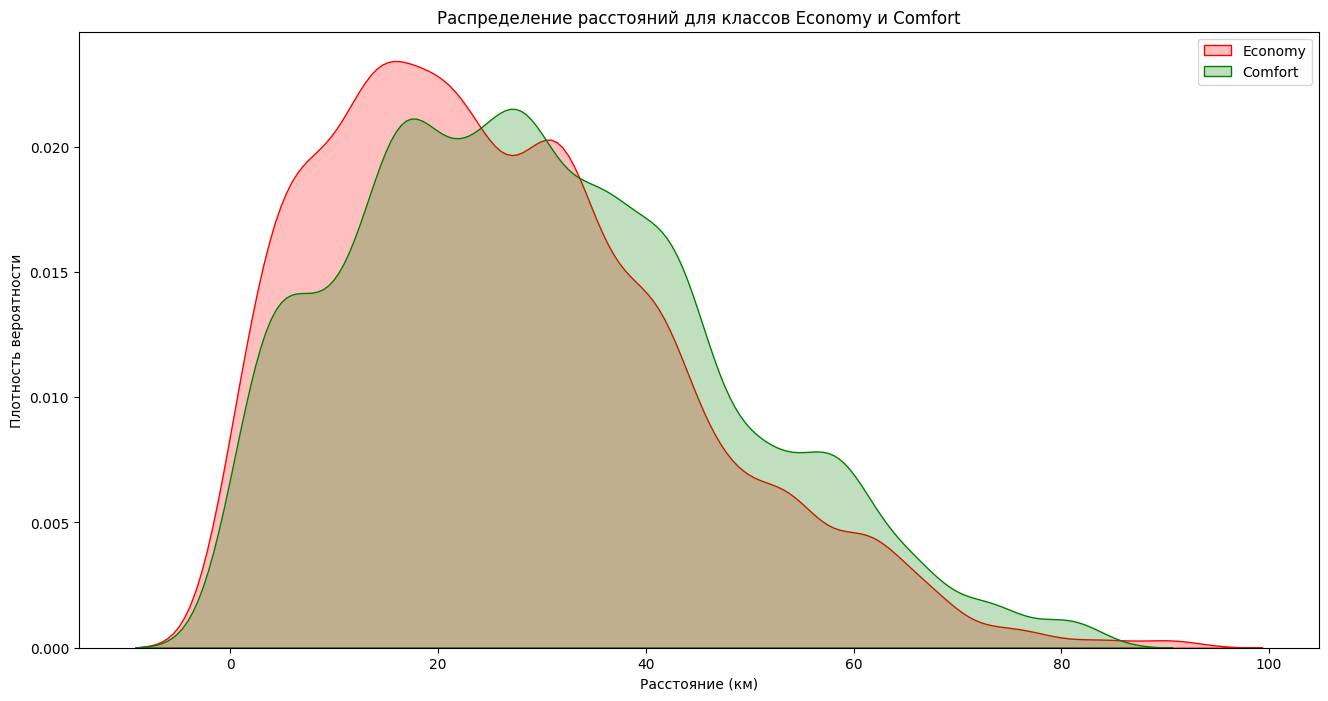

In [145]:
# Фильтрация данных по классам
economy_distances = data[data['offer_class_group'] == 'Economy']['distance_km']
comfort_distances = data[data['offer_class_group'] == 'Comfort']['distance_km']

# Построение графиков пересечения для Economy и Comfort
plt.figure(figsize=(16, 8))

sns.kdeplot(economy_distances, fill=True, color='red', bw_adjust=0.6, label='Economy')
sns.kdeplot(comfort_distances, fill=True, color='green', bw_adjust=0.6, label='Comfort')

plt.title('Распределение расстояний для классов Economy и Comfort')
plt.xlabel('Расстояние (км)')
plt.ylabel('Плотность вероятности')
plt.legend()

5. Каково отношение количества отмененных поездок ко всем поездкам? 

driver_response
0     826
1    1174
Name: count, dtype: int64


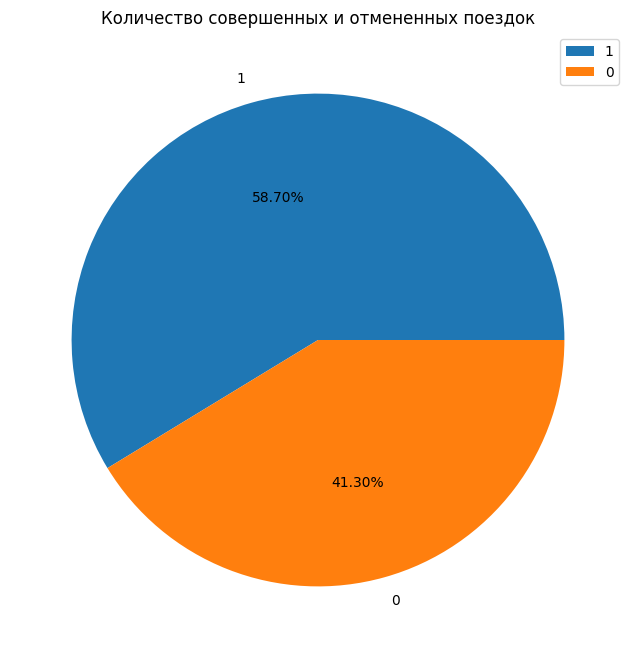

In [146]:
plt.figure(figsize=(16, 8))


plt.title('Количество совершенных и отмененных поездок')
trips_by_class = data['driver_response'].value_counts()
print(trips_by_class.sort_values())

plt.pie(trips_by_class.values, labels=trips_by_class.index, autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.show()

6. Какой процент отмененных поездок (driver_response = 0) в зависимости от времени дня и дня недели?

   *Найти периоды с наибольшей вероятностью отмены поездок.*

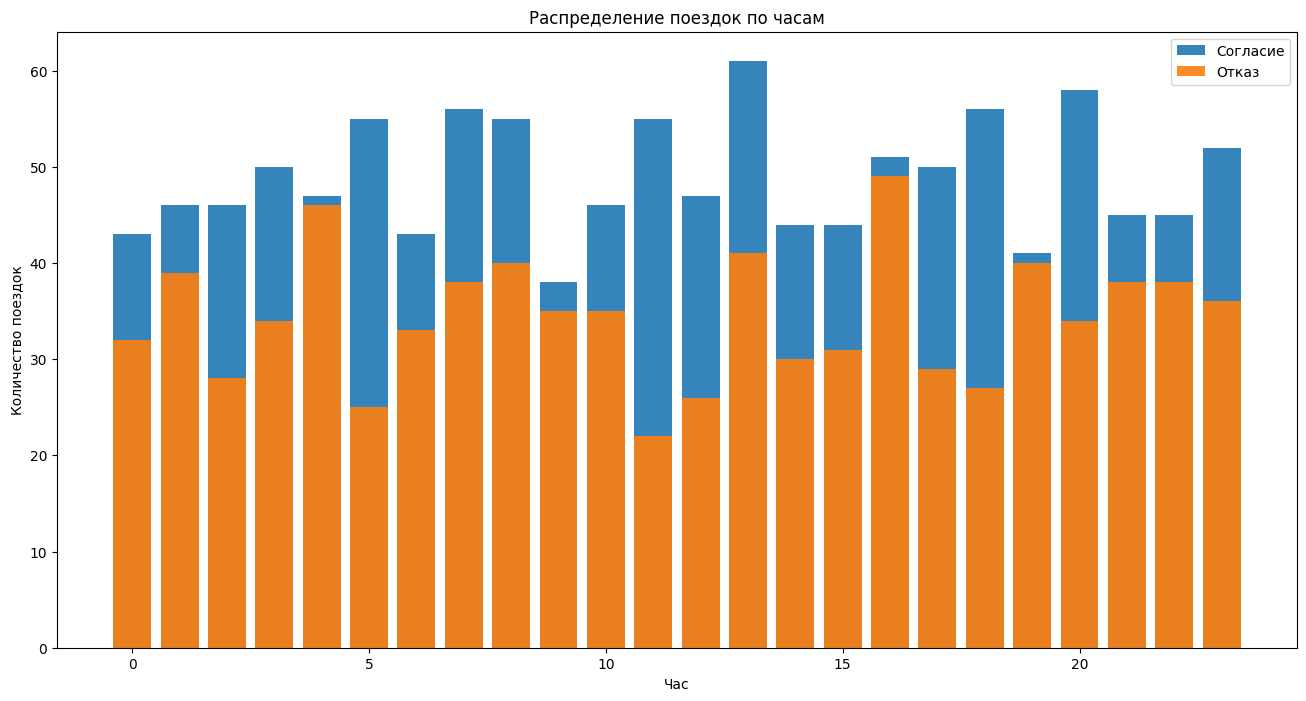

In [147]:
plt.figure(figsize=(16, 8))

# Фильтрация данных по часам
trips_by_hour_refusal = data[data['driver_response'] == 0]['hour_key'].value_counts()
trips_by_hour_agreement = data[data['driver_response'] == 1]['hour_key'].value_counts()

plt.bar(trips_by_hour_agreement.index, trips_by_hour_agreement.values, alpha=0.9, label='Согласие')
plt.bar(trips_by_hour_refusal.index, trips_by_hour_refusal.values, alpha=0.9, label='Отказ')

plt.title('Распределение поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()


Больше всего отказов в 16, чуть меньше в 4, 13 и 19 часов.

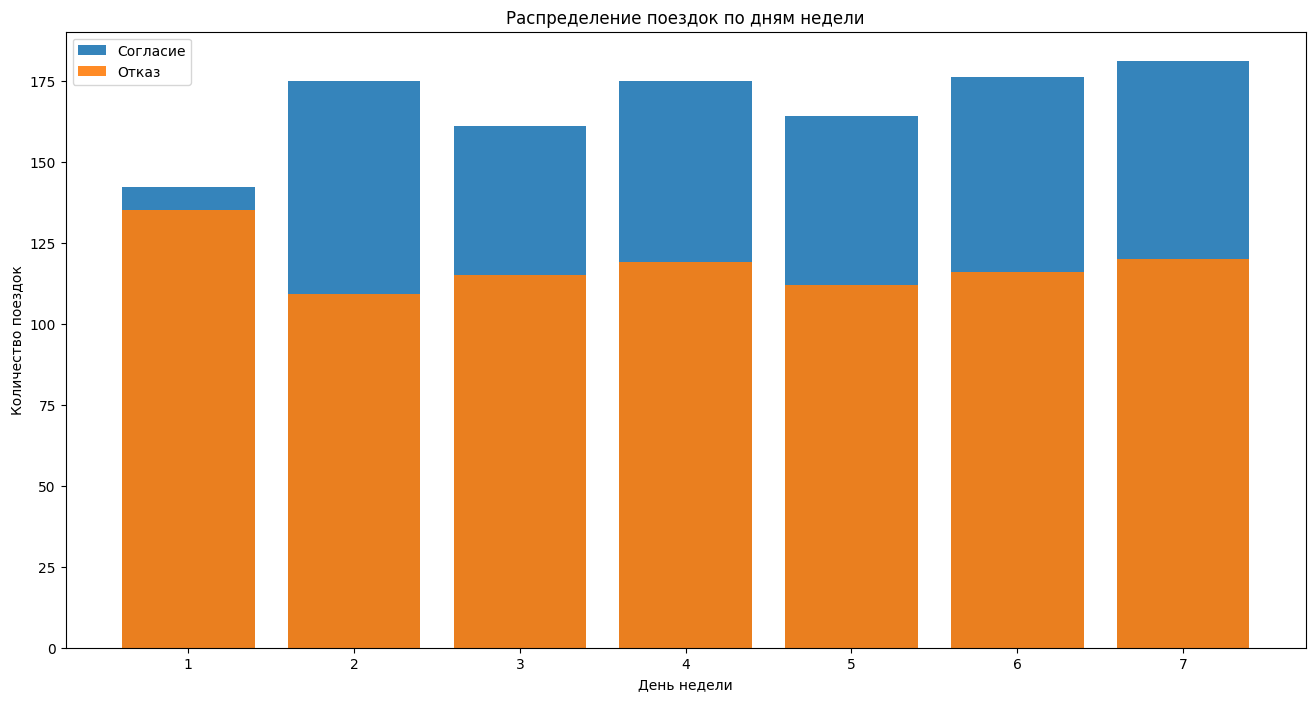

In [148]:
plt.figure(figsize=(16, 8))

# Фильтрация данных по дням
trips_by_hour_refusal = data[data['driver_response'] == 0]['weekday_key'].value_counts()
trips_by_hour_agreement = data[data['driver_response'] == 1]['weekday_key'].value_counts()

plt.bar(trips_by_hour_agreement.index, trips_by_hour_agreement.values, alpha=0.9, label='Согласие')
plt.bar(trips_by_hour_refusal.index, trips_by_hour_refusal.values, alpha=0.9, label='Отказ')

plt.title('Распределение поездок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()


Больше всего отказов понедельник. 
(Видимо не все хотят куда-то ехать в этот день)

7. Поездки какого класса чаще всего отменяют? А в процентном соотношении по классам? 

*Есть ли зависимости между классом поездки и вероятностью ее отмены?*

Количество отмененных поездок по классам:
offer_class_group
Economy     289
Comfort     257
Delivery    174
Premium     106
Name: count, dtype: int64

Процент отмен по классам:
offer_class_group
Economy     57.8
Comfort     51.4
Delivery    34.8
Premium     21.2
Name: count, dtype: float64


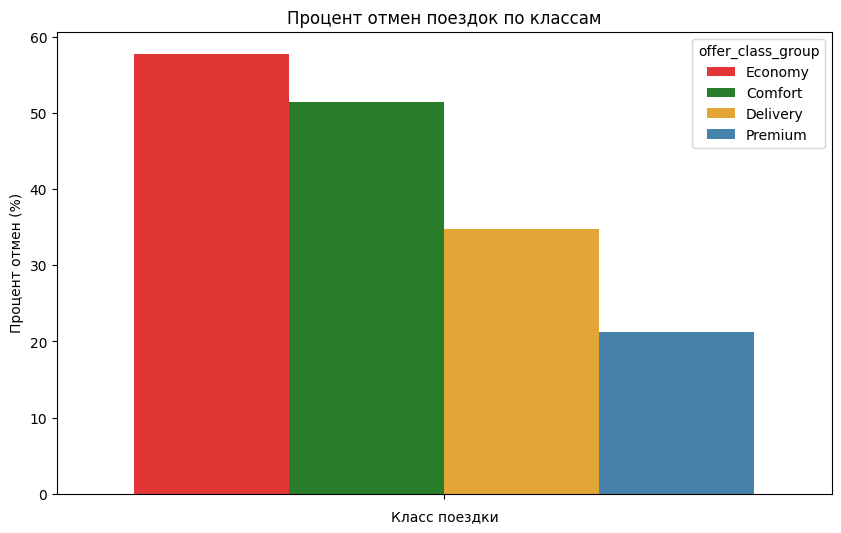

In [149]:
# Считаем количество отмен для каждого класса
cancellations_by_class = data[data['driver_response'] == 0]['offer_class_group'].value_counts()

# Считаем общее количество поездок по каждому классу
total_trips_by_class = data['offer_class_group'].value_counts()

# Рассчитываем процент отмен по каждому классу
cancellation_rate = ((cancellations_by_class / total_trips_by_class) * 100).sort_values(ascending=False)

# Выводим результаты
print("Количество отмененных поездок по классам:")
print(cancellations_by_class)
print("\nПроцент отмен по классам:")
print(cancellation_rate)

# Визуализация зависимости между классом поездки и вероятностью ее отмены
plt.figure(figsize=(10, 6))
sns.barplot(hue = cancellation_rate.index, y=cancellation_rate.values, 
            palette=['red', 'green', 'orange', sns.color_palette()[0]], alpha=0.9)
plt.title('Процент отмен поездок по классам')
plt.xlabel('Класс поездки')
plt.ylabel('Процент отмен (%)')
plt.show()


Economy


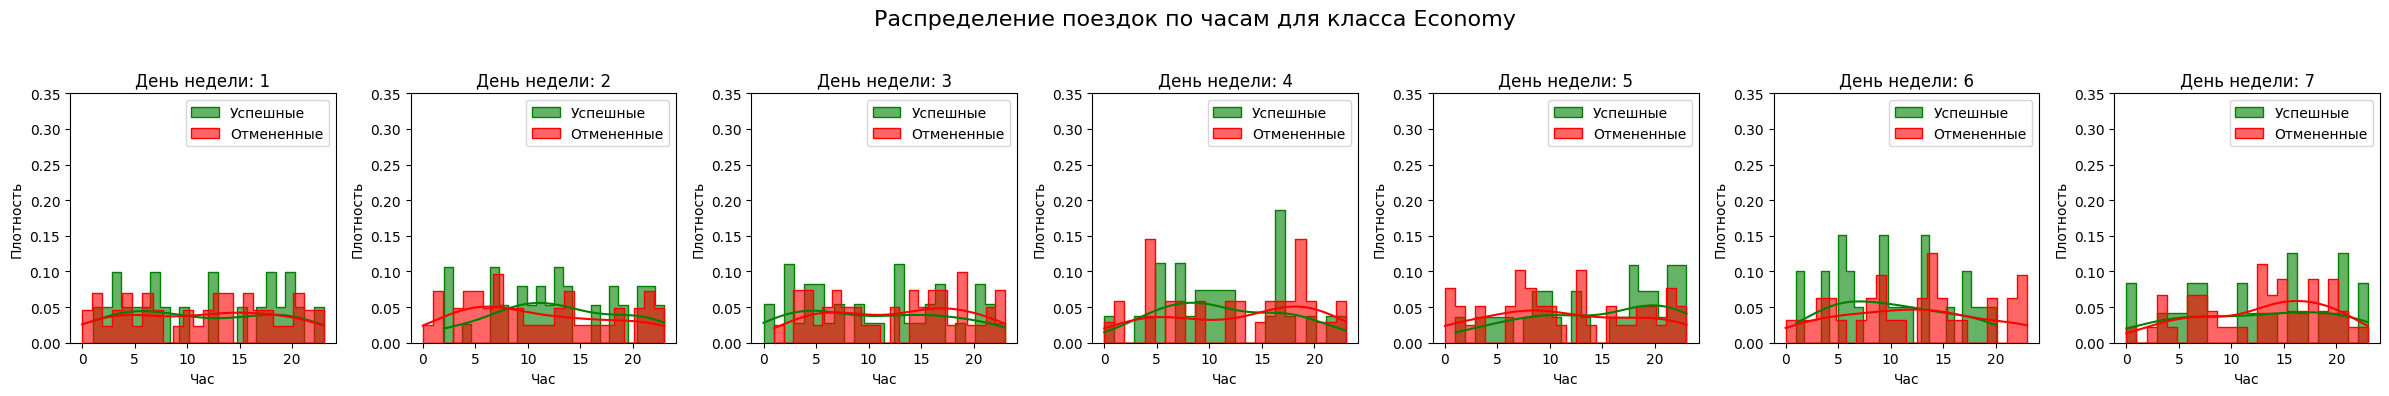

Comfort


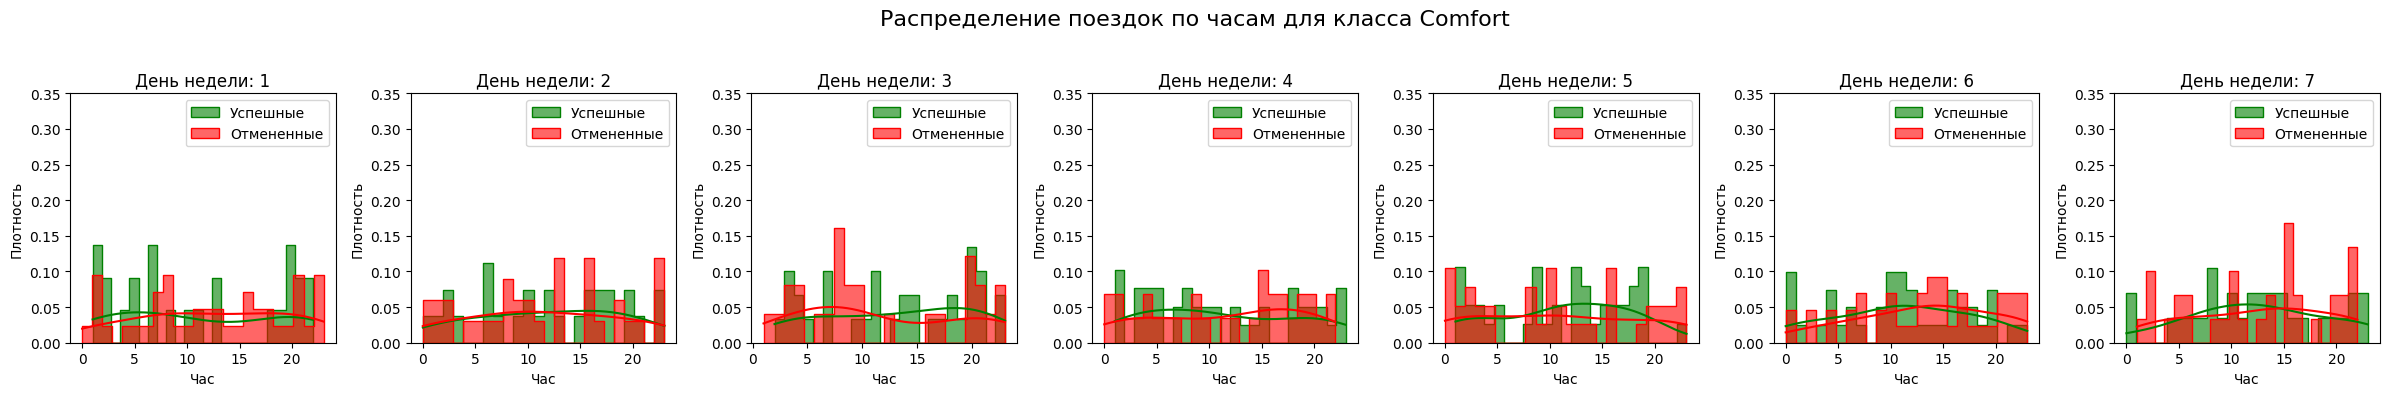

Delivery


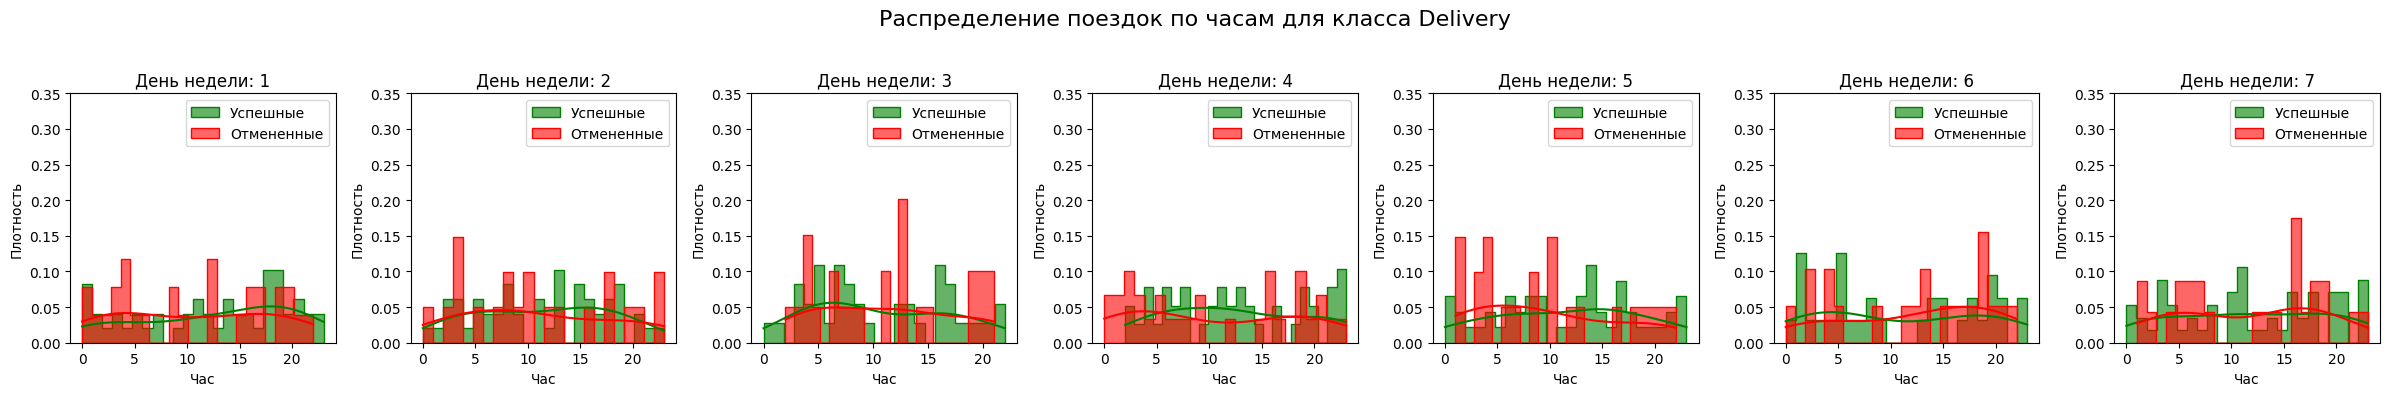

Premium


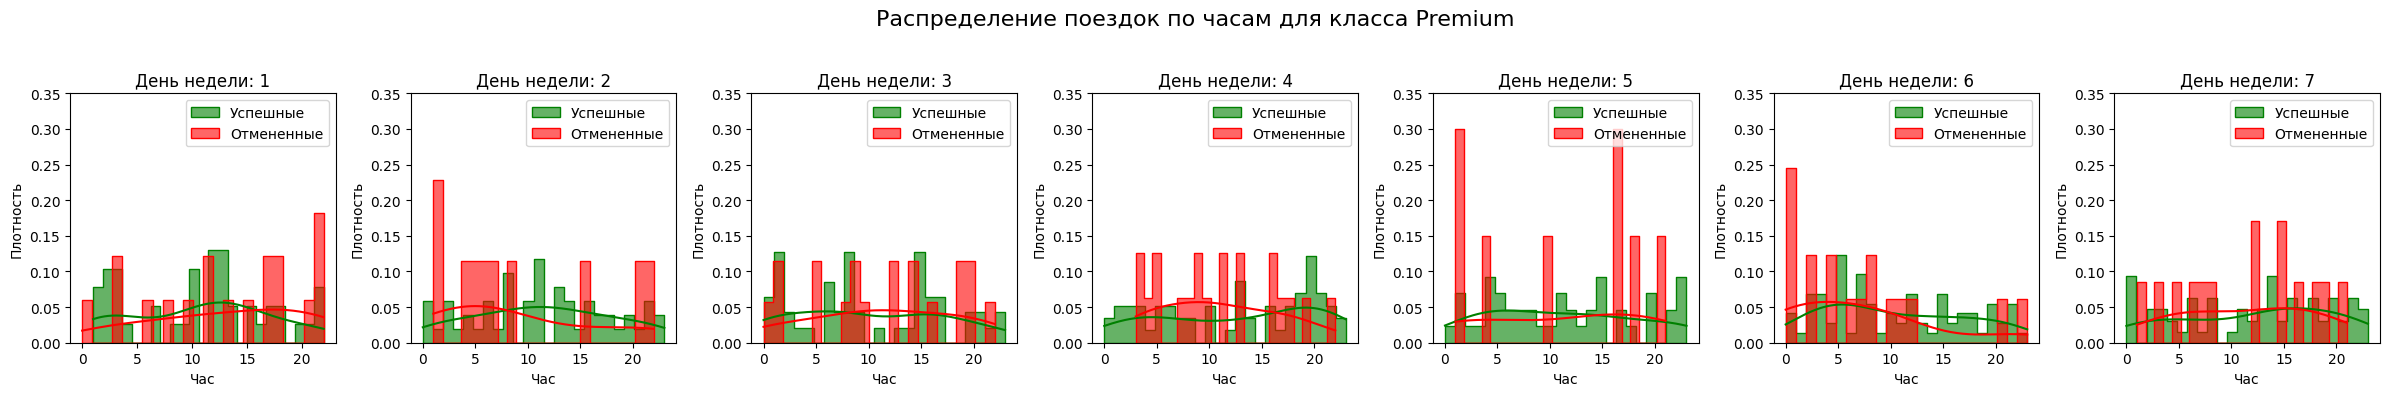

In [150]:
#  построение графиков по классам, дням недели и часам
def plot_class_by_weekday_hour(data, class_name):
    class_data = data[data['offer_class_group'] == class_name]
    
    plt.figure(figsize=(24, 4))
    plt.suptitle(f'Распределение поездок по часам для класса {class_name}', fontsize=16)
    
    for day in range(1, 8):
        plt.subplot(1, 7, day)
        
        # Данные для текущего дня недели
        day_data = class_data[class_data['weekday_key'] == day]
        
        # Разделение на успешные поездки и отмененные поездки
        completed_trips = day_data[day_data['driver_response'] == 1]['hour_key']
        cancelled_trips = day_data[day_data['driver_response'] == 0]['hour_key']
        
        sns.histplot(completed_trips, bins=24, color='green', label='Успешные', kde=True, stat='density', element='step', alpha=0.6)
        sns.histplot(cancelled_trips, bins=24, color='red', label='Отмененные', kde=True, stat='density', element='step', alpha=0.6)
        plt.title(f'День недели: {day}')
        plt.ylim(0, 0.35)
        plt.xlabel('Час')
        plt.ylabel('Плотность')
        plt.legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Построение графиков для каждого класса
for class_name in cancellations_by_class.index:
    print(class_name)
    plot_class_by_weekday_hour(data, class_name)


Больше всего отмен:
 - в целом в классе Economy
 - в пятницу у Premium в 17 и 2 часа

### Гипотезы:
1. В будние дни (weekday_key) наблюдается больше поездок в часы пик (hour_key), чем в выходные.


2. Эконом-класс чаще используется для коротких поездок (distance_km) по сравнению с Comfort и Premium.


3.  Поездки поздним вечером и ночью чаще отменяются, чем поездки в дневное время.

4. В выходные дни больше отмен по сравнению с будними.

5. Чем дальше поездка (distance_km), тем выше вероятность её отмены.


6. Premium класс имеет самую низкую вероятность отмены по сравнению с Economy и Comfort.

7. Пиковые часы дня (например, утро и вечер) приводят к большему числу отмен из-за перегруженности системы.

8. В выходные дни больше поездок на короткие дистанции (distance_km), чем в будние дни.


### 2	Рассчитайте основные описательные статистики (среднее, минимум, 25-50-75-персентили, максимум)

### 3	Вычислите количество значений по классам такси

### 4	Визуализируйте распределение дистанций поездок

### 5	Визуализируйте распределения дистанций поездок, по каждому классу такси в отдельности, а также определите типы распределений для эконом-класса и комфорт-класса
### 6	Сформируйте выборки по эконом и комфорт-классам. Визуализируйте пересечение интервалов дистанций этих классов 
(примечание: поможет функция seaborn.distplot или seaborn.kdeplot)


### 7	Проведите стат. тест 
(поможет: функция scipy.stats.ttest_ind), проверьте гипотезу, что дистанции поездок в комфорт-классе отличаются от дистанций поездок эконом-класса (примечание: H0 – выборки не отличаются, H1 – выборки отличны; уровень значимости = 5%)

In [10]:
comfort_distances = data[data['offer_class_group'] == 'Comfort']['distance_km']
economy_distances = data[data['offer_class_group'] == 'Economy']['distance_km']

# Проведение t-теста
t_stat, p_value = stats.ttest_ind(comfort_distances, economy_distances)

# Уровень значимости
alpha = 0.05

# Вывод результатов
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Проверка гипотезы
if p_value < alpha:
    print("Отклоняем нулевую гипотезу (H0), выборки отличаются.")
else:
    print("Не можем отклонить нулевую гипотезу (H0), выборки не отличаются.")

# Извлекаем выборки дистанций для классов Comfort и Economy
comfort_distances = data[data['offer_class_group'] == 'Comfort']['distance_km']
economy_distances = data[data['offer_class_group'] == 'Economy']['distance_km']

# Проведение t-теста
t_stat, p_value = stats.ttest_ind(comfort_distances, economy_distances)

# Уровень значимости
alpha = 0.05

# Вывод результатов
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Проверка гипотезы
if p_value < alpha:
    print("Отклоняем нулевую гипотезу (H0), выборки отличаются.")
else:
    print("Не можем отклонить нулевую гипотезу (H0), выборки не отличаются.")


t-statistic: 3.1706, p-value: 0.0016
Отклоняем нулевую гипотезу (H0), выборки отличаются.
t-statistic: 3.1706, p-value: 0.0016
Отклоняем нулевую гипотезу (H0), выборки отличаются.


### 8	Сделайте выводы по результатам проведения стат. теста
### 9	Вычислите средние выборок исследуемых классов, с учётом полученного результата проверки гипотез определите – какой из классов предпочитают на дальние поездки (эконом или комфорт)
### 10	Оформите презентацию для демонстрации результатов стейкхолдерам (примечание: для оформления воспользуйтесь шаблоном)